The Model Development Jupyter Notebook consists of 2 key sections: A) Exploratory Data Analysis of the simulated labeled dataset containing candidate information with final status of joining/not joining and B) Building and selecting the final classifier model to predict if a candidate will join/not join the organization.

In [1]:
%matplotlib inline
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns 
import warnings
import sklearn
import statsmodels.api as sm 
import scipy.stats as st
import pickle
from sklearn import preprocessing
from sklearn.model_selection import train_test_split
from sklearn import metrics
from sklearn.impute import SimpleImputer
from sklearn.metrics import mean_squared_error
from sklearn.model_selection import cross_val_score, train_test_split
from sklearn.ensemble import RandomForestRegressor
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import classification_report
from sklearn.metrics import mean_squared_error
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import GridSearchCV
warnings.filterwarnings('ignore')
sns.set()

In [2]:
data=pd.read_csv("Labeled Data.csv")
data.head()

,SLNO,Candidate Ref,DOJ Extended,Duration to accept offer,Notice period,Offered band,Pecent hike expected in CTC,Percent hike offered in CTC,Percent difference CTC,Joining Bonus,...,Candidate Source,Rex in Yrs,Companies Count,LOB,Location,Proximity to Job Location,Age,Switch Rate,Match Score,Status
0,1,2110407,Yes,14,30,E2,-20.79,13.16,42.86,No,...,Agency,7,1,ERS,Delhi,43,34.0,0.142857143,0.25,Joined
1,2,2112635,No,18,30,E2,50.00,320.00,180.00,No,...,Employee Referral,8,4,INFRA,Bengaluru,2175,34.0,0.5,0.50,Joined
2,3,2112838,No,3,45,E2,42.84,42.84,0.00,No,...,Agency,4,2,INFRA,Delhi,43,27.0,0.5,0.57,Joined
3,4,2115021,No,26,30,E2,42.84,42.84,0.00,No,...,Employee Referral,4,1,INFRA,Delhi,43,34.0,0.25,0.38,Joined
4,5,2115125,Yes,1,120,E2,42.59,42.59,0.00,No,...,Employee Referral,6,3,INFRA,Delhi,43,34.0,0.5,0.33,Joined


In [3]:
data.shape

(8995, 22)

In [4]:
data.describe().T

,count,mean,std,min,25%,50%,75%,max
SLNO,8995.0,5.970984e+03,3373.963454,1.00,3207.50,5976.0,8739.00,12333.00
Candidate Ref,8995.0,2.843647e+06,486344.774552,2109586.00,2386476.00,2807482.0,3300059.50,3836076.00
Duration to accept offer,8995.0,2.143446e+01,25.811616,0.00,3.00,10.0,33.00,224.00
Notice period,8995.0,3.929183e+01,22.220239,0.00,30.00,30.0,60.00,120.00
Pecent hike expected in CTC,8995.0,4.386480e+01,29.788975,-68.83,27.27,40.0,53.85,359.77
Percent hike offered in CTC,8995.0,4.065736e+01,36.064060,-60.53,22.09,36.0,50.00,471.43
Percent difference CTC,8995.0,-1.573802e+00,19.610729,-67.27,-8.33,0.0,0.00,300.00
Rex in Yrs,8995.0,4.239022e+00,2.547571,0.00,3.00,4.0,6.00,24.00
Companies Count,8995.0,2.345970e+00,1.059249,1.00,2.00,2.0,3.00,4.00
Proximity to Job Location,8995.0,1.447060e+03,977.023061,43.00,43.00,2175.0,2175.00,2175.00


In [5]:
data.describe(include=object).T

,count,unique,top,freq
DOJ Extended,8995,2,No,4788
Offered band,8982,4,E1,5565
Joining Bonus,8995,2,No,8578
Candidate relocate actual,8995,2,No,7705
Gender,8995,2,Male,7444
Candidate Source,8995,3,Direct,4801
LOB,8995,9,INFRA,2850
Location,8995,3,Bengaluru,5442
Switch Rate,8995,46,1,1876
Status,8995,2,Joined,7313


In [6]:
data.duplicated().sum()
data.dropna()

,SLNO,Candidate Ref,DOJ Extended,Duration to accept offer,Notice period,Offered band,Pecent hike expected in CTC,Percent hike offered in CTC,Percent difference CTC,Joining Bonus,...,Candidate Source,Rex in Yrs,Companies Count,LOB,Location,Proximity to Job Location,Age,Switch Rate,Match Score,Status
0,1,2110407,Yes,14,30,E2,-20.79,13.16,42.86,No,...,Agency,7,1,ERS,Delhi,43,34.0,0.142857143,0.25,Joined
1,2,2112635,No,18,30,E2,50.00,320.00,180.00,No,...,Employee Referral,8,4,INFRA,Bengaluru,2175,34.0,0.5,0.50,Joined
2,3,2112838,No,3,45,E2,42.84,42.84,0.00,No,...,Agency,4,2,INFRA,Delhi,43,27.0,0.5,0.57,Joined
3,4,2115021,No,26,30,E2,42.84,42.84,0.00,No,...,Employee Referral,4,1,INFRA,Delhi,43,34.0,0.25,0.38,Joined
4,5,2115125,Yes,1,120,E2,42.59,42.59,0.00,No,...,Employee Referral,6,3,INFRA,Delhi,43,34.0,0.5,0.33,Joined
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
8990,12319,3822427,No,4,0,E1,191.67,191.67,0.00,No,...,Employee Referral,1,2,ERS,Bengaluru,2175,34.0,2,0.20,Joined
8991,12327,3828206,Yes,2,0,E1,150.00,150.00,0.00,No,...,Direct,3,2,BFSI,Bengaluru,2175,34.0,0.666666667,0.21,Joined
8992,12331,3834159,No,0,0,E2,35.42,35.42,0.00,No,...,Direct,5,1,INFRA,Delhi,43,34.0,0.2,0.54,Joined
8993,12332,3835433,No,0,30,E1,76.92,53.85,-13.04,No,...,Direct,4,2,INFRA,Delhi,43,34.0,0.5,0.23,Joined


In [7]:
data['Age'].fillna(data["Age"].median(),inplace=True)

In [8]:
data['Offered band'].value_counts()

E1    5565
E2    2704
E3     502
E0     211
Name: Offered band, dtype: int64

In [9]:
imputer=data.copy()
freq_imputer=SimpleImputer(strategy='most_frequent')
imputer.loc[:,['Offered band']]=freq_imputer.fit_transform(imputer.loc[:,['Offered band']])

In [10]:
data=imputer.copy()
data.isnull().sum()

SLNO                           0
Candidate Ref                  0
DOJ Extended                   0
Duration to accept offer       0
Notice period                  0
Offered band                   0
Pecent hike expected in CTC    0
Percent hike offered in CTC    0
Percent difference CTC         0
Joining Bonus                  0
Candidate relocate actual      0
Gender                         0
Candidate Source               0
Rex in Yrs                     0
Companies Count                0
LOB                            0
Location                       0
Proximity to Job Location      0
Age                            0
Switch Rate                    0
Match Score                    0
Status                         0
dtype: int64

In [11]:
data.columns

Index(['SLNO', 'Candidate Ref', 'DOJ Extended', 'Duration to accept offer',
       'Notice period', 'Offered band', 'Pecent hike expected in CTC',
       'Percent hike offered in CTC', 'Percent difference CTC',
       'Joining Bonus', 'Candidate relocate actual', 'Gender',
       'Candidate Source', 'Rex in Yrs', 'Companies Count', 'LOB', 'Location',
       'Proximity to Job Location', 'Age', 'Switch Rate', 'Match Score',
       'Status'],
      dtype='object')

In [12]:
data['Status'].value_counts()

Joined        7313
Not Joined    1682
Name: Status, dtype: int64

In [13]:
def countp(x, data):
    plt.figure(figsize = (10,8))
    sns.countplot(x = x, data = data, hue = 'Status', palette = 'rocket')
    plt.xlabel(x)
    plt.xticks(rotation=90)

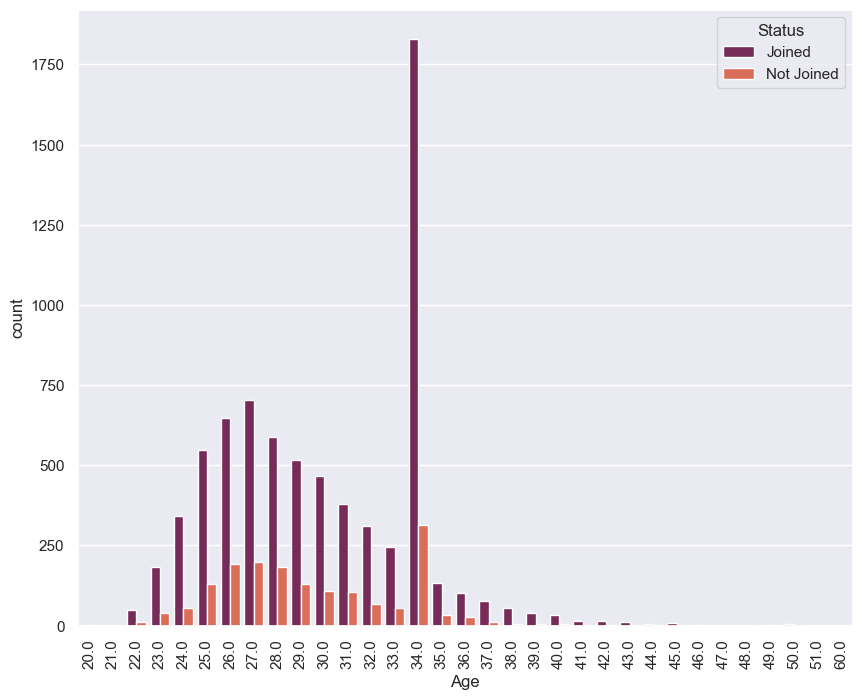

In [14]:
countp('Age',data)

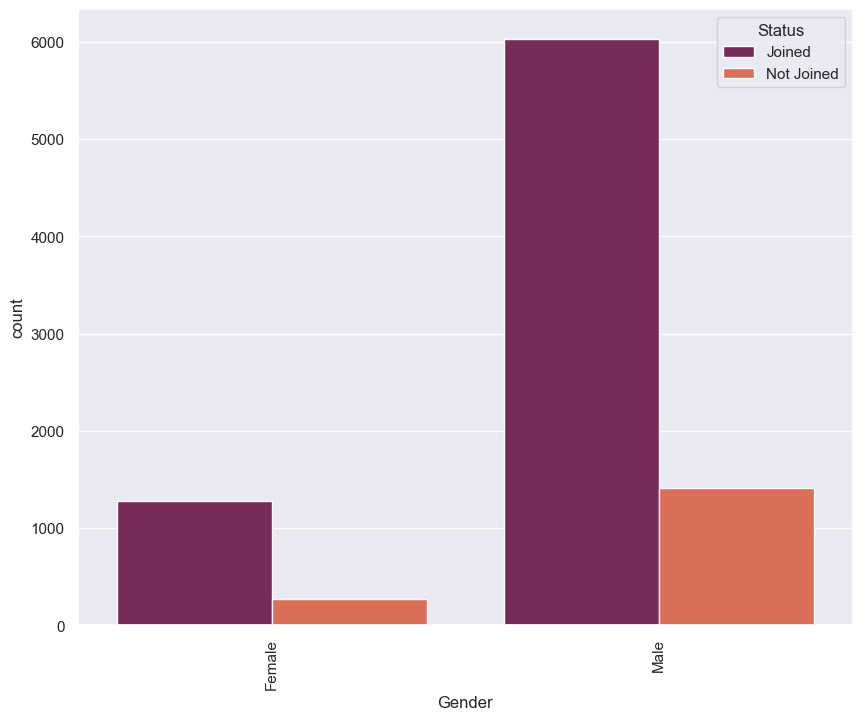

In [15]:
countp('Gender',data)

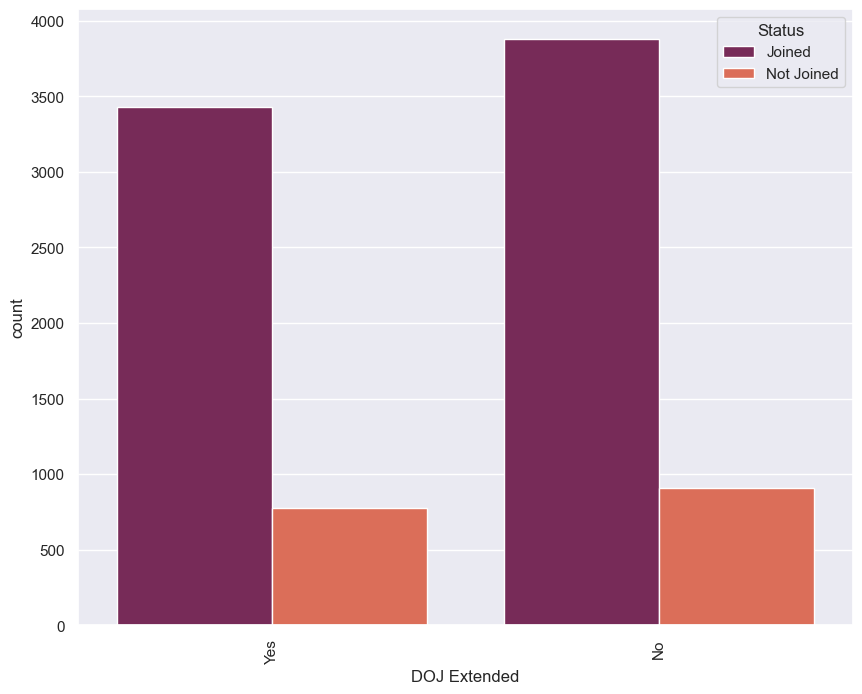

In [16]:
countp('DOJ Extended',data)

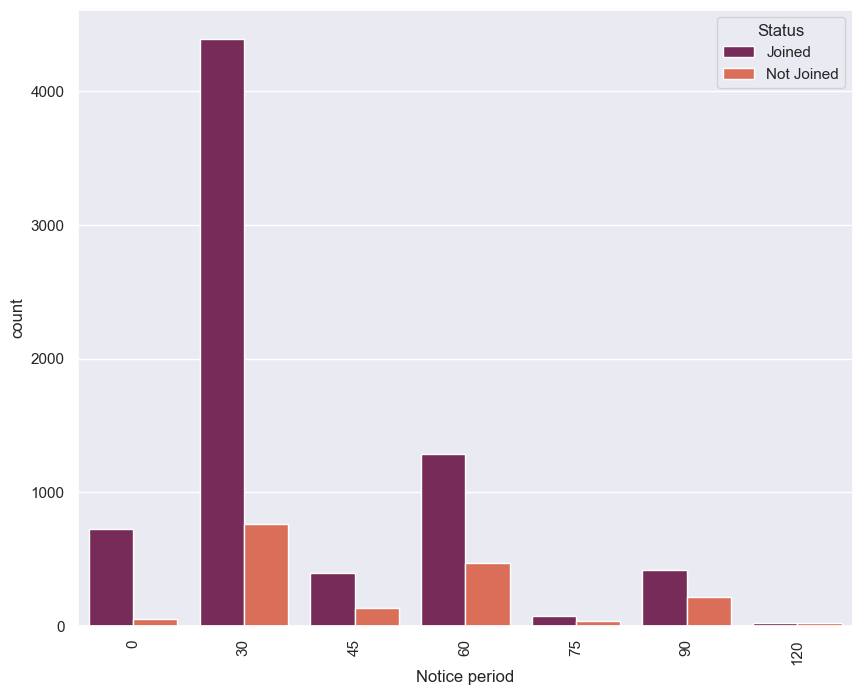

In [17]:
countp('Notice period',data)

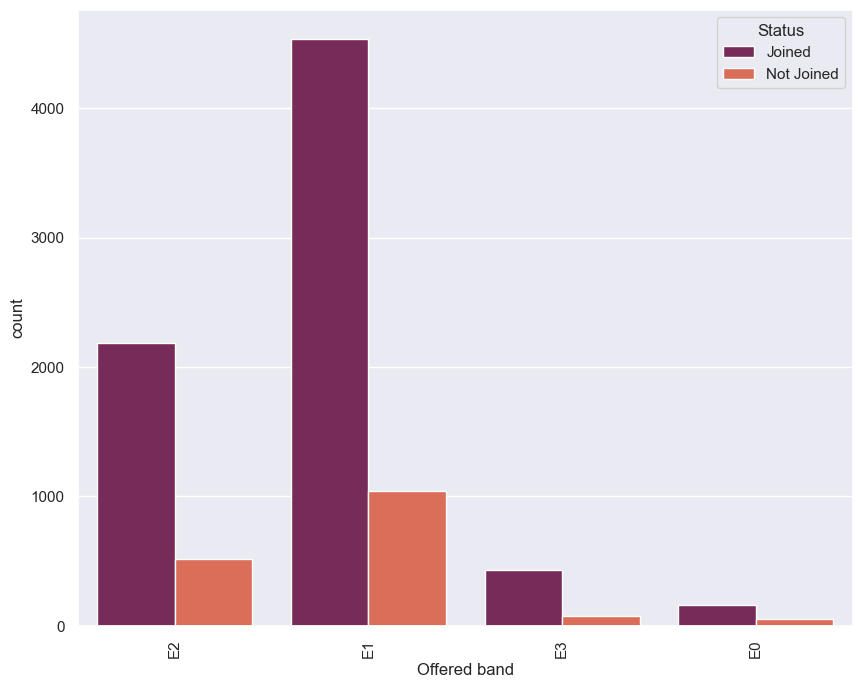

In [18]:
countp('Offered band',data)

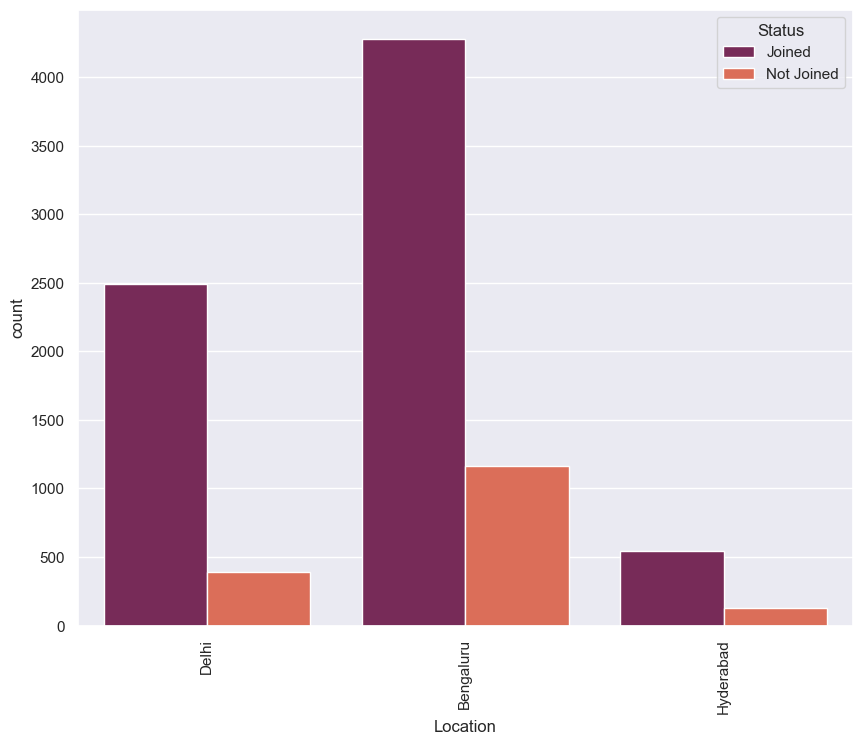

In [19]:
countp('Location',data)

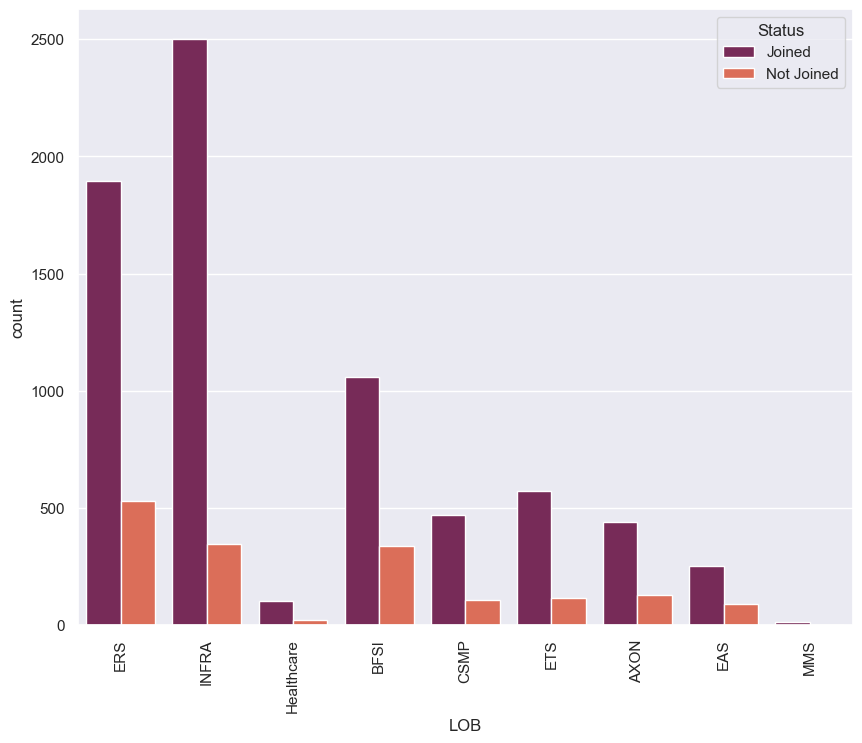

In [20]:
countp('LOB',data)

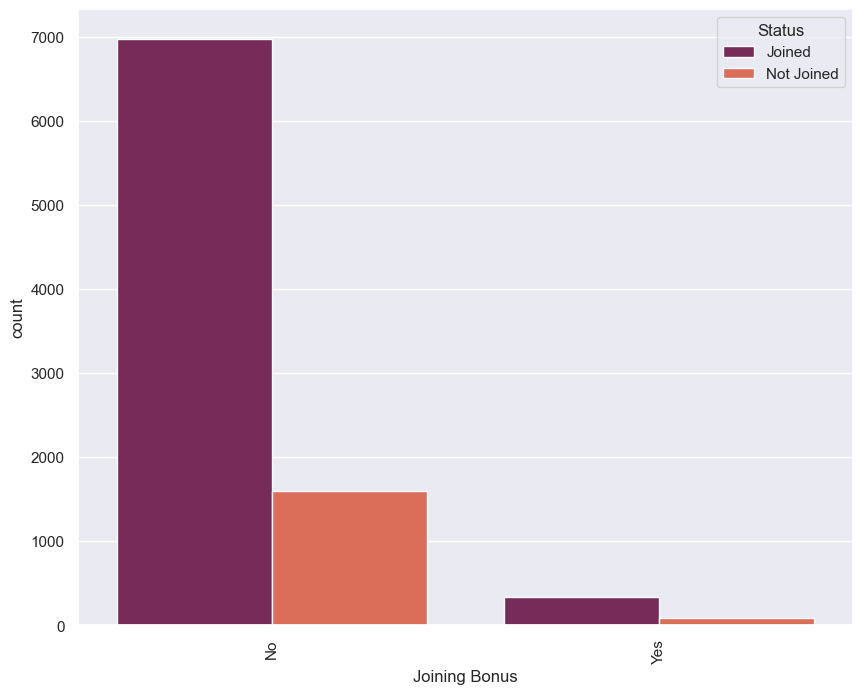

In [21]:
countp('Joining Bonus',data)

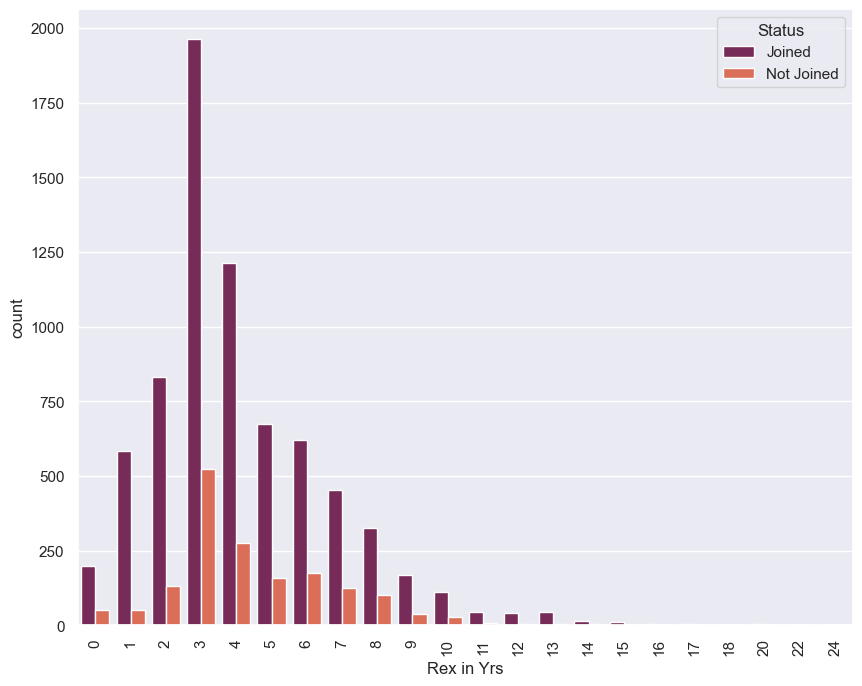

In [22]:
countp('Rex in Yrs',data)

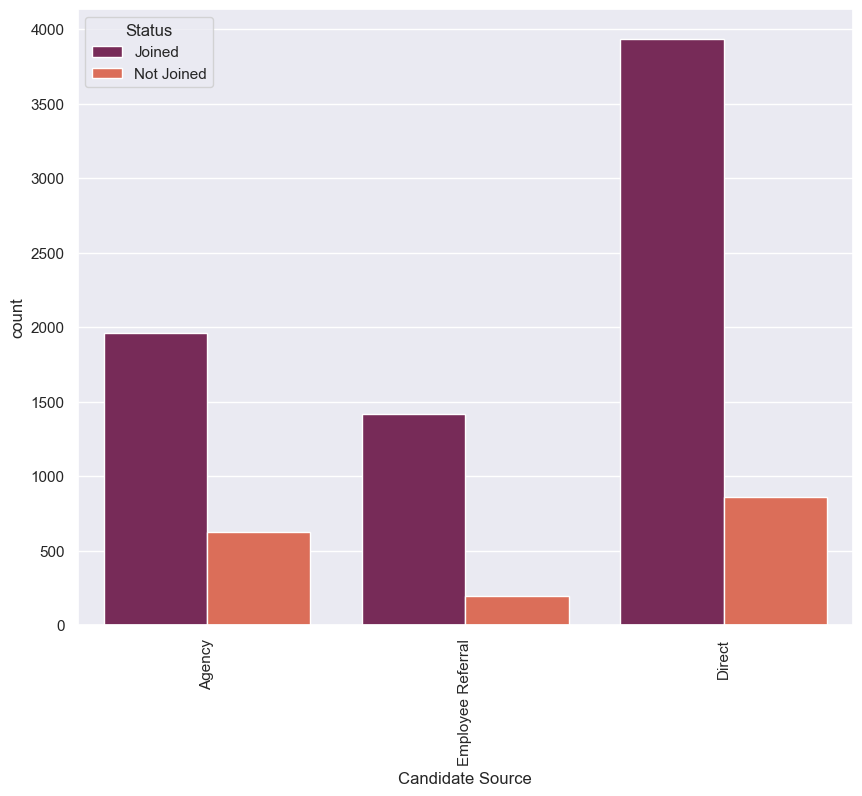

In [23]:
countp('Candidate Source',data)

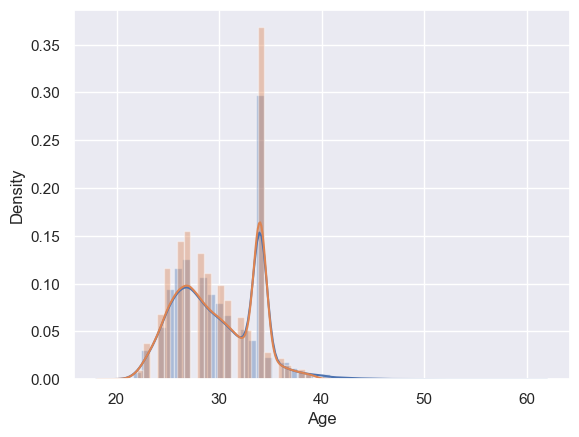

In [24]:
sns.distplot(data['Age']);
data=data[data['Age'] < data['Age'].quantile(.99)]
sns.distplot(data['Age']);

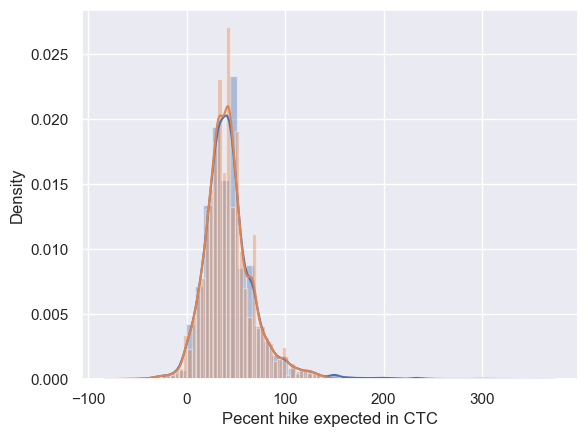

In [25]:
sns.distplot(data['Pecent hike expected in CTC']);
data=data[data['Pecent hike expected in CTC'] < data['Pecent hike expected in CTC'].quantile(.99)]
sns.distplot(data['Pecent hike expected in CTC']);

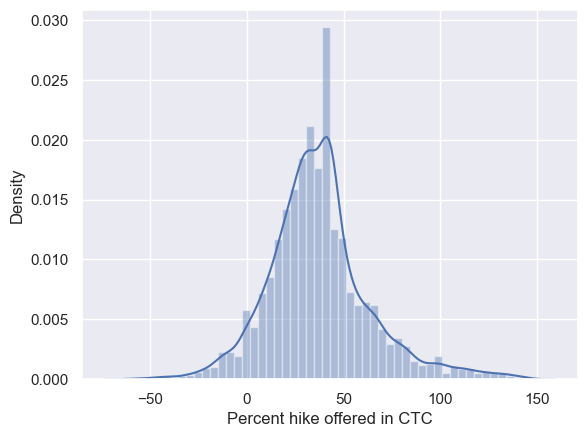

In [26]:
data=data[data['Percent hike offered in CTC'] < data['Percent hike offered in CTC'].quantile(.99)]
sns.distplot(data['Percent hike offered in CTC']);

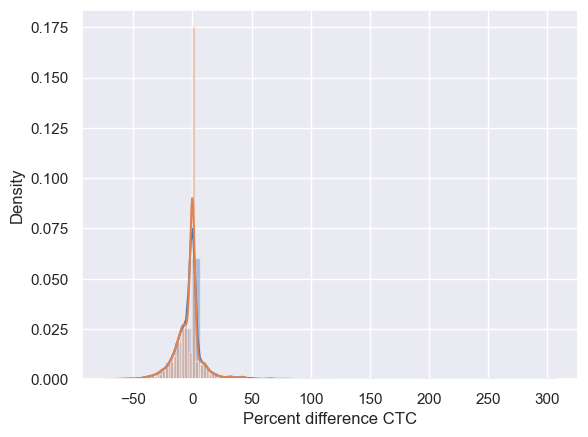

In [27]:
#Removing Outliers from Percent difference CTC
sns.distplot(data['Percent difference CTC']);
data=data[data['Percent difference CTC'] < data['Percent difference CTC'].quantile(.99)]
sns.distplot(data['Percent difference CTC']);

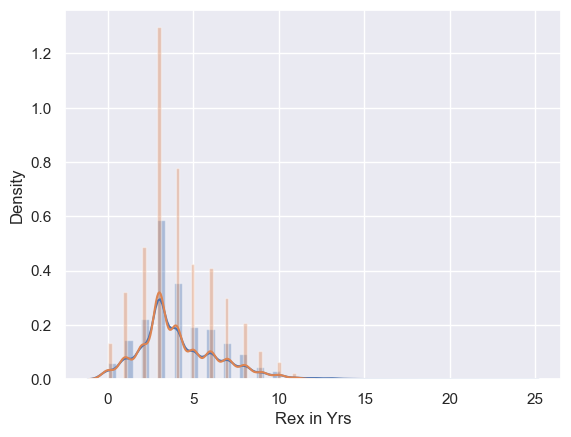

In [28]:
#Removing Outliers from Exp In Years
sns.distplot(data['Rex in Yrs']);
data=data[data['Rex in Yrs'] < data['Rex in Yrs'].quantile(.99)]
sns.distplot(data['Rex in Yrs']);

In [29]:
#Building the Model

Logistic Regression

In [30]:
data['Status']=data['Status'].apply(lambda x:0 if x=='Not Joined' else 1)

In [31]:
data.columns

Index(['SLNO', 'Candidate Ref', 'DOJ Extended', 'Duration to accept offer',
       'Notice period', 'Offered band', 'Pecent hike expected in CTC',
       'Percent hike offered in CTC', 'Percent difference CTC',
       'Joining Bonus', 'Candidate relocate actual', 'Gender',
       'Candidate Source', 'Rex in Yrs', 'Companies Count', 'LOB', 'Location',
       'Proximity to Job Location', 'Age', 'Switch Rate', 'Match Score',
       'Status'],
      dtype='object')

In [32]:
x_feature = list(data.columns)

In [33]:
x_feature.remove('Status') 
x_feature.remove("Pecent hike expected in CTC") 
x_feature.remove("Percent hike offered in CTC")
x_feature.remove("SLNO")
x_feature.remove("Candidate Ref")
x_feature.remove("Switch Rate")
x_feature.remove("Location")
x_feature.remove("Candidate Source")
# x_feature.remove("const")

In [34]:
encoded_data = pd.get_dummies(data[x_feature],drop_first=True)

In [35]:
y = data['Status']
x = encoded_data
# x = sm.add_constant(x1)

In [36]:
encoded_data = pd.get_dummies(data[x_feature],drop_first=True)

In [37]:
encoded_data.columns

Index(['Duration to accept offer', 'Notice period', 'Percent difference CTC',
       'Rex in Yrs', 'Companies Count', 'Proximity to Job Location', 'Age',
       'Match Score', 'DOJ Extended_Yes', 'Offered band_E1', 'Offered band_E2',
       'Offered band_E3', 'Joining Bonus_Yes', 'Candidate relocate actual_Yes',
       'Gender_Male', 'LOB_BFSI', 'LOB_CSMP', 'LOB_EAS', 'LOB_ERS', 'LOB_ETS',
       'LOB_Healthcare', 'LOB_INFRA', 'LOB_MMS'],
      dtype='object')

In [38]:
x_train,x_test,y_train,y_test = train_test_split(x,y, train_size = 0.8, random_state = 42)

Decision Tree Classifier

In [39]:
dtc = DecisionTreeClassifier()
dtc.fit(x_train,y_train)
y_pred_dt = dtc.predict(x_test)
y_pred_dt_train = dtc.predict(x_train)
print(metrics.classification_report(y_test, y_pred_dt))

              precision    recall  f1-score   support

           0       0.30      0.36      0.33       311
           1       0.85      0.81      0.83      1387

    accuracy                           0.73      1698
   macro avg       0.57      0.58      0.58      1698
weighted avg       0.75      0.73      0.74      1698



KNearest Classifier

In [40]:
knn_classifier = KNeighborsClassifier()
knn_classifier.fit(x_train,y_train)
y_pred_knn=knn_classifier.predict(x_test)
print(classification_report(y_test, y_pred_knn))

              precision    recall  f1-score   support

           0       0.39      0.21      0.27       311
           1       0.84      0.93      0.88      1387

    accuracy                           0.80      1698
   macro avg       0.62      0.57      0.58      1698
weighted avg       0.76      0.80      0.77      1698



In [41]:
#confusion_matrix(y_test, y_pred_knn)

In [44]:
#Random Forest Classifer For Feature Selection

In [43]:
from sklearn.ensemble import RandomForestClassifier 
from sklearn.feature_selection import SelectFromModel
classifier = SelectFromModel(RandomForestClassifier(n_estimators= 10))
classifier.fit(x_train,y_train)

SelectFromModel(estimator=RandomForestClassifier(n_estimators=10))

In [45]:
classifier.get_support()

array([ True,  True,  True,  True,  True, False,  True,  True, False,
       False, False, False, False, False, False, False, False, False,
       False, False, False, False, False])

In [46]:
selected_feat = x_train.columns[(classifier.get_support())]
len(selected_feat)
print(selected_feat)

Index(['Duration to accept offer', 'Notice period', 'Percent difference CTC',
       'Rex in Yrs', 'Companies Count', 'Age', 'Match Score'],
      dtype='object')


In [ ]:
#We will add LOB as well since it will make business sense since a candidate is more likely  to accept an offer in the same domain/LOB

Random Forest Classifier - Building the Actual Model

In [47]:
from sklearn.ensemble import RandomForestClassifier 
from sklearn.feature_selection import SelectFromModel

rc_classifier = RandomForestClassifier()
rc_classifier.fit(x_train,y_train)
y_pred_r=rc_classifier.predict(x_test)
print(classification_report(y_test, y_pred_r))

              precision    recall  f1-score   support

           0       0.52      0.16      0.24       311
           1       0.84      0.97      0.90      1387

    accuracy                           0.82      1698
   macro avg       0.68      0.56      0.57      1698
weighted avg       0.78      0.82      0.78      1698



In [48]:
# Saving model in a pickle file
import pickle

# save
with open('model1.pkl','wb') as f:
    pickle.dump(knn_classifier,f)

In [49]:
x_train.columns.to_list()

['Duration to accept offer',
 'Notice period',
 'Percent difference CTC',
 'Rex in Yrs',
 'Companies Count',
 'Proximity to Job Location',
 'Age',
 'Match Score',
 'DOJ Extended_Yes',
 'Offered band_E1',
 'Offered band_E2',
 'Offered band_E3',
 'Joining Bonus_Yes',
 'Candidate relocate actual_Yes',
 'Gender_Male',
 'LOB_BFSI',
 'LOB_CSMP',
 'LOB_EAS',
 'LOB_ERS',
 'LOB_ETS',
 'LOB_Healthcare',
 'LOB_INFRA',
 'LOB_MMS']

In [50]:
test = x_train.head(1)

In [51]:
test

,Duration to accept offer,Notice period,Percent difference CTC,Rex in Yrs,Companies Count,Proximity to Job Location,Age,Match Score,DOJ Extended_Yes,Offered band_E1,...,Candidate relocate actual_Yes,Gender_Male,LOB_BFSI,LOB_CSMP,LOB_EAS,LOB_ERS,LOB_ETS,LOB_Healthcare,LOB_INFRA,LOB_MMS
1184,17,30,19.05,4,1,43,28.0,0.21,0,0,...,1,1,0,0,0,0,0,0,1,0


Random Forest Regressor

In [52]:
forest = RandomForestRegressor(n_estimators=10, random_state=17)
forest.fit(x_train, y_train)

y_train_pred = forest.predict(x_train)
y_test_pred = forest.predict(x_test)
print('Mean squared error (train): {:.3f}'.format(mean_squared_error(y_train, y_train_pred)))
print('Mean squared error (holdout): {:.3f}'.format(mean_squared_error(y_test, y_test_pred)))

Mean squared error (train): 0.026
Mean squared error (holdout): 0.150


Understanding Embedded Feature Importance using Random Forest

In [53]:
forest_params = {'max_depth': range(10, 25), 'max_features': range(6,12)}
locally_best_forest = GridSearchCV(forest, forest_params,scoring='neg_mean_squared_error', cv=5, n_jobs=-1)
locally_best_forest.fit(x_train, y_train)
print(abs(locally_best_forest.best_score_), locally_best_forest.best_params_)

0.13450647607468613 {'max_depth': 10, 'max_features': 8}


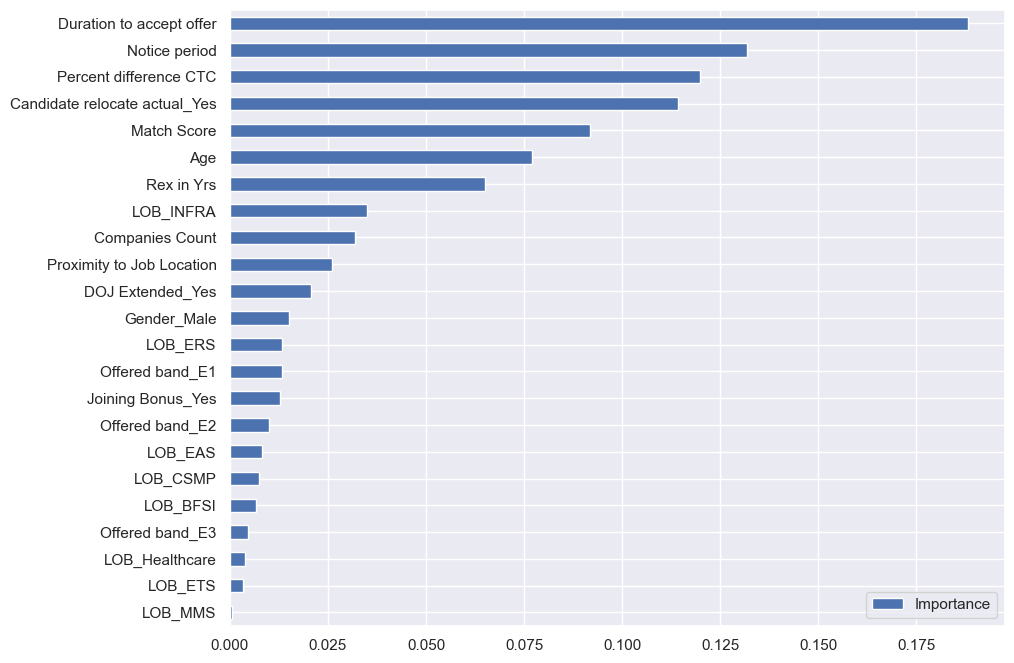

In [54]:
importances = pd.DataFrame(locally_best_forest.best_estimator_.feature_importances_,index=x.columns,columns=['Importance'])
importances.sort_values('Importance').plot(kind='barh', figsize = (10,8));

In [55]:
with open('model1.pkl', 'rb') as f:
    loaded_classifier = pickle.load(f)

In [56]:
y

0       1
2       1
3       1
4       1
5       1
       ..
8988    1
8989    0
8992    1
8993    1
8994    1
Name: Status, Length: 8490, dtype: int64